In [1]:
############   IMPORTS AND CONFIG   ############   

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
import pandas as pd
import random
import seaborn as sns
from functools import reduce
from math import comb


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# prettier Matplotlib.
#import matplotlib.style as style
#style.use('seaborn-white') #sets the size of the charts
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [20]:
NUM_ITEMS = 4
NUM_FEATURES =  20000
rows = int(np.log2(NUM_ITEMS)) + 1
#p_list = np.arange(0.8, 0.9, 0.05)

def initial_value():
    ber_rv_1 = int(bernoulli.rvs(1/2, size = 1, loc = 0))
    if ber_rv_1 == 1:
        return 1
    else:
        return -1 
    
def flip(p):
    ber_rv_2 = int(bernoulli.rvs(p, size = 1, loc = 0))
    if ber_rv_2 == 1:
        return 1
    else:
        return -1 

def generate_training_set(p):
    arr = np.empty(NUM_ITEMS)
    sim_array = np.empty((rows, NUM_ITEMS))
    for N in range(NUM_FEATURES):
        sim_array[0,0] = initial_value()
        sim_array[1,0] = sim_array[0,0] * flip(p)
        sim_array[1,1] = sim_array[0,0] * flip(p)
        for i in range(2, rows):
            for j in range(2**i):
                sim_array[i,j] = sim_array[i-1,int(np.floor(j/2))]*flip(p)
            if i == rows - 1:
                arr = np.vstack([arr, sim_array[rows - 1 ]])
    arr = np.delete(arr, 0, axis=0)
    return(arr)

def cov_analytical(d, p):
    add = 0
    for i in range(d+1):
        if i%2 == 0:
            add += comb(d, d-i)*(p**i)*(1-p)**(d-i) 
        else:
            add -= comb(d, d-1)*(p**i)*(1-p)**(d-i) 
    return(add**2)

(array([1.205, 1.124, 0.843, 0.829]),
 array([[-0.472, -0.526, -0.648,  0.284],
        [-0.471, -0.528,  0.647, -0.285],
        [-0.527,  0.472, -0.283, -0.648],
        [-0.527,  0.471,  0.285,  0.647]]))

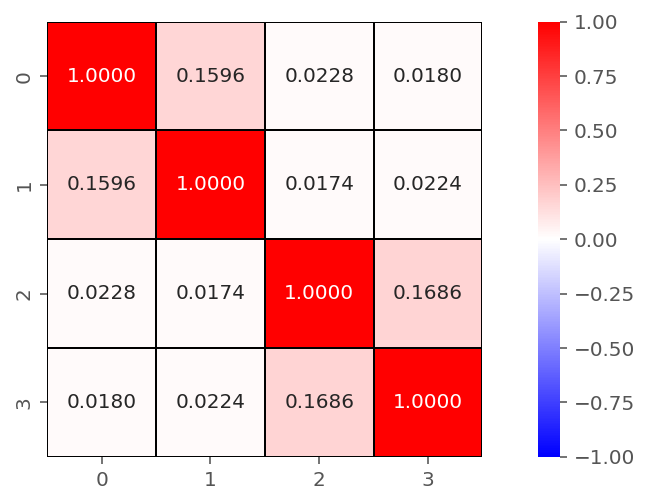

In [49]:
fig = plt.figure(figsize = (10,4))
train_input = np.identity(NUM_ITEMS)
#train_output = generate_training_set(0.3)
#train_output_plist = [generate_training_set(p) for p in p_list]
u,s,v = np.linalg.svd(train_output)
sns.heatmap(np.cov(train_output.T),cmap = 'bwr', vmin = -1, vmax = 1, square = True,cbar = True, linewidths = 1, linecolor = 'black', annot = True ,fmt = '.4f')
x = np.identity(5)
np.linalg.eig(np.cov(train_output.T))
#fig.tight_layout()
#plt.savefig('blockcov.pdf', bbox_inches = 'tight', pad_inches = 0)

In [40]:
x = np.identity(4)
x[3,2] = x[2,3] = x[0,1] = x[1,0] =  cov_analytical(1,0.3)
x[1,2] = x[2,1] = x[0,3] = x[3,0] = x[0,2] = x[2,0] = x[3,1] = x[1,3] = cov_analytical(2,0.3)
np.sort(np.sqrt(np.linalg.eigvals(x) * NUM_FEATURES))


array([129.615, 129.615, 148.916, 155.641])

In [ ]:
fig, axes = plt.subplots(nrows = len(p_list), ncols = 2, figsize = (12,12))

for m, subplot in np.ndenumerate(axes):
    
    if(m[1] == 0):
        axes[m].plot(deep_linear_modes_plist[m[0]], color = 'red', alpha = 1)
        axes[m].set_title('3-LNN, diffusion probability p = ' + "{:.2f}".format(p_list[m[0]]))
    else:
        axes[m].plot(shallow_linear_modes_plist[m[0]], color = 'red', alpha = 1)
        axes[m].set_title('2-LNN, diffusion probability p = ' + "{:.2f}".format(p_list[m[0]]))
    
    subplot.set_xlabel('Time (Epochs)', weight = 'bold')
    subplot.set_ylabel('Effective Singular Value', weight = 'bold')
    
fig.tight_layout()